In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [71]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [72]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [73]:
from llm_toolkit.logical_reasoning_utils import *

In [74]:
model_name = "Qwen2.5-72B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [75]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   text                                                             3000 non-null   object
 1   label                                                            3000 non-null   object
 2   title                                                            3000 non-null   object
 3   puzzle                                                           3000 non-null   object
 4   truth                                                            3000 non-null   object
 5   Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf                 3000 non-null   object
 6   Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf   3000 non-null   object
 7   Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloa

In [76]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                 model  \
0     0.0  Qwen2.5-72B-Instruct   
1     0.2  Qwen2.5-72B-Instruct   
2     0.4  Qwen2.5-72B-Instruct   
3     0.6  Qwen2.5-72B-Instruct   
4     0.8  Qwen2.5-72B-Instruct   
5     1.0  Qwen2.5-72B-Instruct   
6     1.2  Qwen2.5-72B-Instruct   
7     1.4  Qwen2.5-72B-Instruct   
8     1.6  Qwen2.5-72B-Instruct   
9     1.8  Qwen2.5-72B-Instruct   
10    2.0  Qwen2.5-72B-Instruct   

                                                  run  accuracy  precision  \
0    Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf  0.785667   0.794251   
1   Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch....  0.773667   0.810288   
2   Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch....  0.748000   0.809486   
3   Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch...  0.757667   0.811106   
4   Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch...  0.784667   0.819903   
5   Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch...  0.739667   0.813223   
6   Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch...  0.775667   0.820804   
7   Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch...  0.767000   0.808973   
8   Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch...  0.764333   0.810618   
9   Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch...  0.774000   0.814496   
10  Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch...  0.767333   0.813472   

      recall        f1  ratio_valid_classifications  
0   0.785667  0.769921                        0.994  
1   0.773667  0.787410                        1.000  
2   0.748000  0.771852                        1.000  
3   0.757667  0.778272                        1.000  
4   0.784667  0.798393                        1.000  
5   0.739667  0.768164                        1.000  
6   0.775667  0.793490                        1.000  
7   0.767000  0.782644                        1.000  
8   0.764333  0.782394                        1.000  
9   0.774000  0.789352                        1.000  
10  0.767333  0.784978                        1.000

0.0: Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf
0.2: Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
0.4: Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
0.6: Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
0.8: Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
1.0: Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
1.2: Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
1.4: Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf
1.6: Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf
1.8: Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf
2.0: Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf


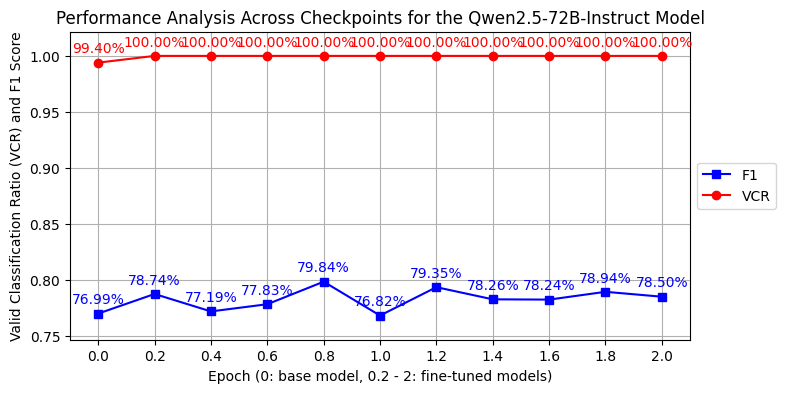

In [77]:
plot_metrics(perf_df, model_name)

In [78]:
perf_df.to_csv(metrics_csv, index=False)

In [79]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-72B-Instruct/shots-00', 'Qwen/Qwen2.5-72B-Instruct/shots-05', 'Qwen/Qwen2.5-72B-Instruct/shots-10']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:504: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                 model                                 run  accuracy  \
0     0  Qwen2.5-72B-Instruct  Qwen/Qwen2.5-72B-Instruct/shots-00  0.785667   
1     5  Qwen2.5-72B-Instruct  Qwen/Qwen2.5-72B-Instruct/shots-05  0.811333   
2    10  Qwen2.5-72B-Instruct  Qwen/Qwen2.5-72B-Instruct/shots-10  0.810333   

   precision    recall        f1  ratio_valid_classifications  
0   0.794251  0.785667  0.769921                     0.994000  
1   0.811226  0.811333  0.803960                     0.941667  
2   0.813684  0.810333  0.808805                     0.912333

0: Qwen/Qwen2.5-72B-Instruct/shots-00
5: Qwen/Qwen2.5-72B-Instruct/shots-05
10: Qwen/Qwen2.5-72B-Instruct/shots-10


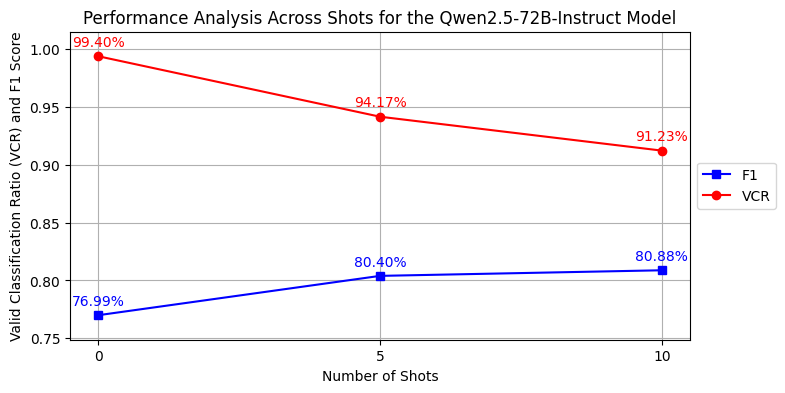

In [80]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [81]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf
不是                                  1934
是                                    973
问法错误                                  35
不重要                                   26
回答正确                                  14
不是。                                    4
不是\n\n（注：参与者的问题“亲情”不是一个封闭式问题，因为它       1
不是\n\n根据谜面提供的信息，没有提到村长甄锐去湖             1
不是\n\n根据谜面，我们知道故事发生在一个小村庄，但并没有提到       1
不是\n\n根据谜底，帽子是小男孩自己带来的，不是村长甄           1
不是\n\n根据谜底，小男孩并不是从小在这个村庄长大的。他小时候       1
是小男孩的哭声。                               1
不是\n\n（解释：参与者的问题假设了背包的主人有孩子，并且         1
不是\n\n根据规则，对于封闭式问题，如果谜面和谜底             1
不是\n\n根据谜面和谜底的信息，甄锐是村长，                1
不是人，是物品。                               1
不是\n\n根据谜面和谜底，带走的不是人也不是物品。             1
不是\n\n（解释：虽然背包的主人确实是对生物充满好奇的学生，        1
不是\n\n根据谜底，甄加索是因为在沙滩上救助海豚              1
不是\n\n根据谜底，死者的死因是因病去世，不是               1
Name: count, dtype: int64


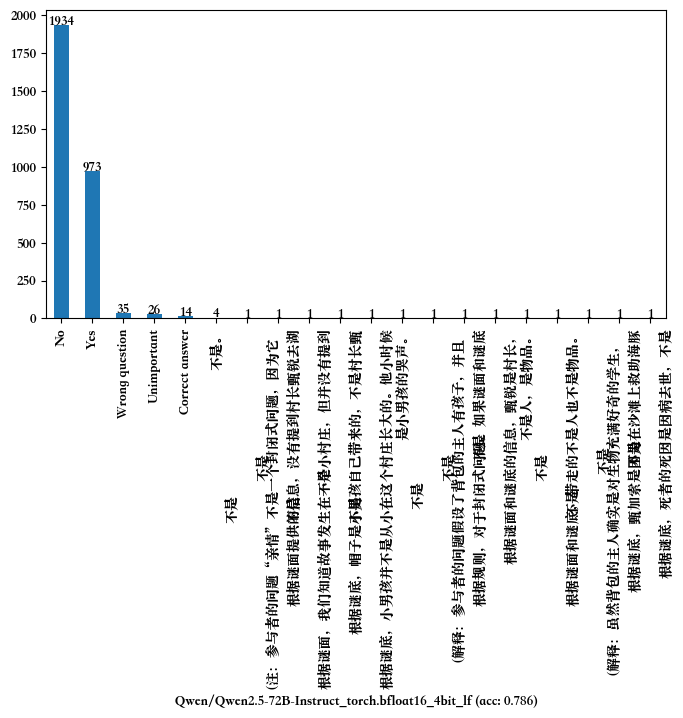

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf
不是      1490
是       1137
不重要      329
回答正确      28
问法错误      16
Name: count, dtype: int64


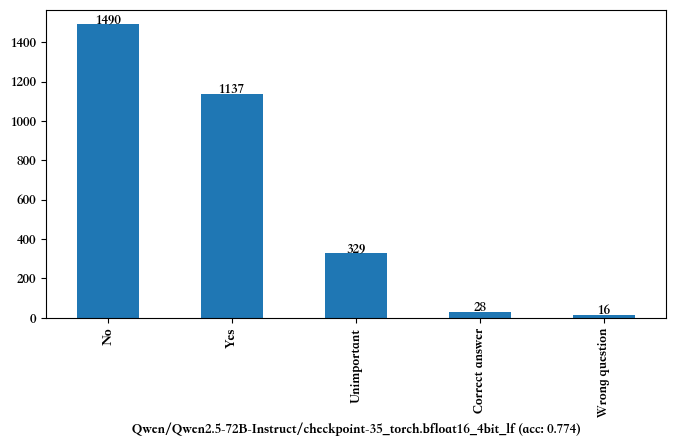

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf
不是      1426
是       1097
不重要      425
回答正确      27
问法错误      25
Name: count, dtype: int64


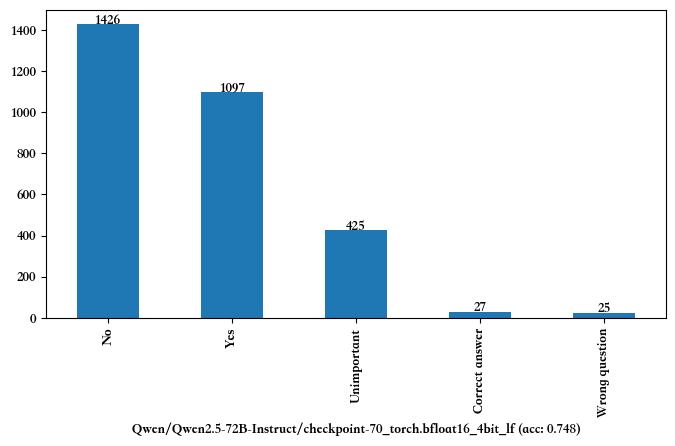

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf
不是      1426
是       1120
不重要      393
问法错误      37
回答正确      24
Name: count, dtype: int64


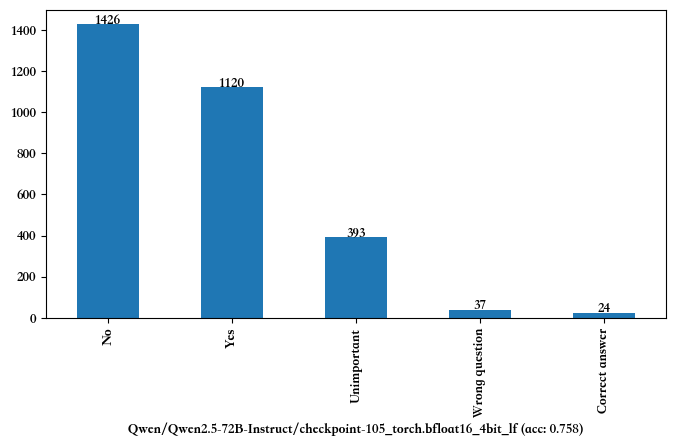

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf
不是      1461
是       1162
不重要      318
问法错误      34
回答正确      25
Name: count, dtype: int64


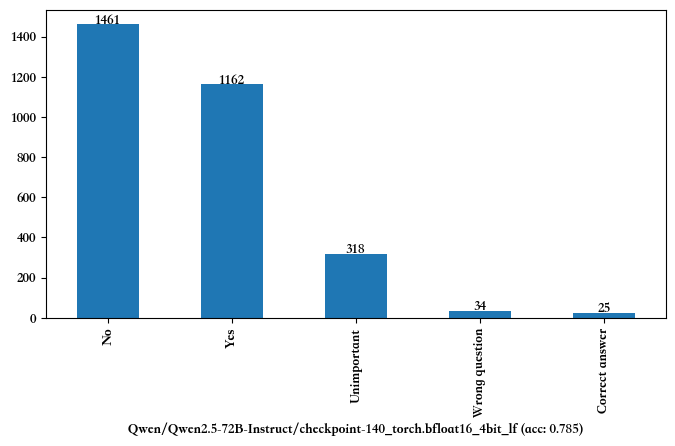

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf
不是      1349
是       1110
不重要      469
问法错误      43
回答正确      29
Name: count, dtype: int64


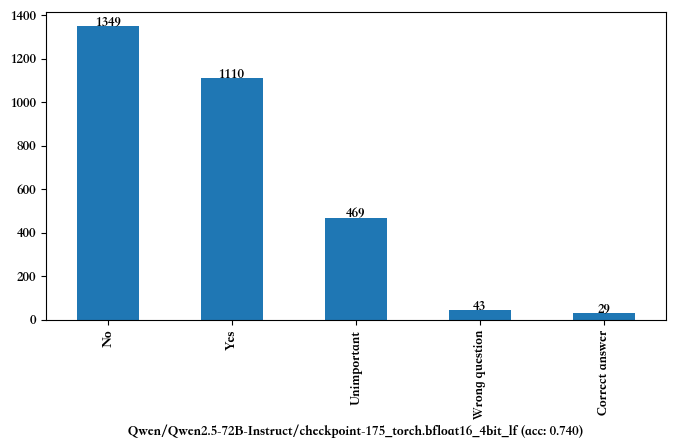

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf
不是      1387
是       1188
不重要      355
问法错误      39
回答正确      31
Name: count, dtype: int64


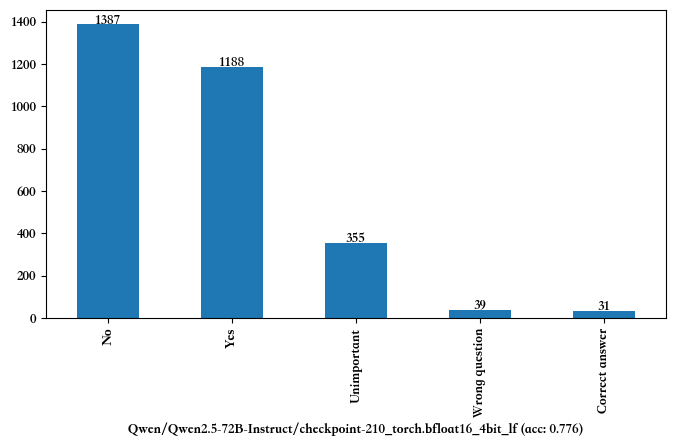

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf
不是      1506
是       1090
不重要      343
问法错误      37
回答正确      24
Name: count, dtype: int64


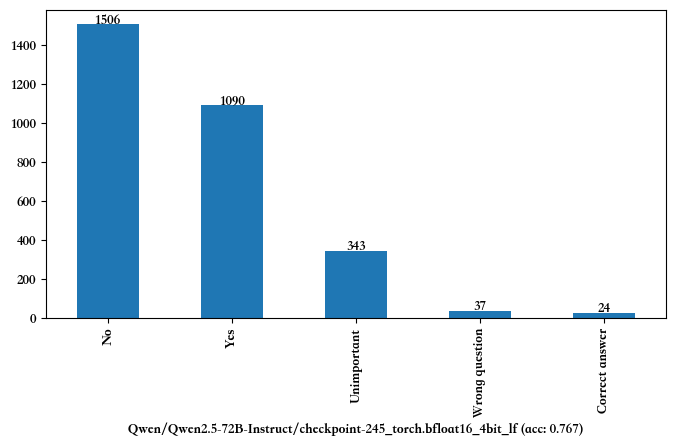

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf
不是      1462
是       1116
不重要      360
问法错误      37
回答正确      25
Name: count, dtype: int64


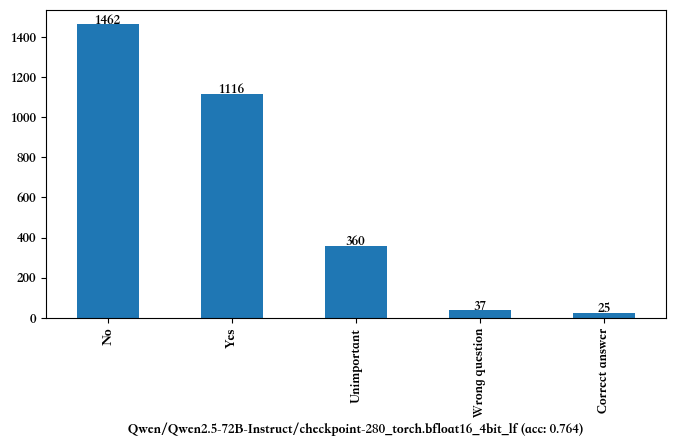

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf
不是      1495
是       1111
不重要      338
问法错误      32
回答正确      24
Name: count, dtype: int64


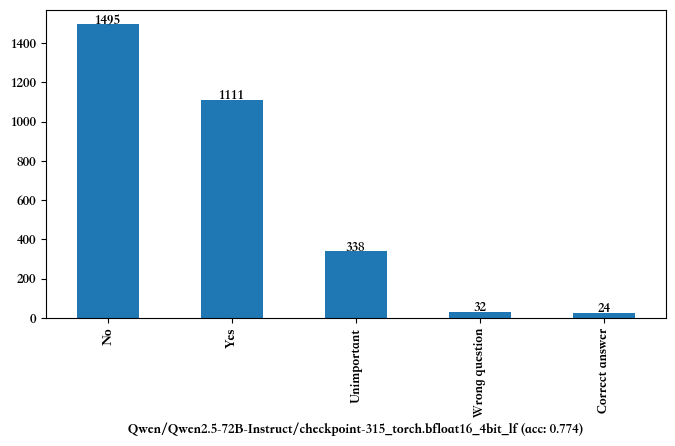

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf
不是      1488
是       1099
不重要      360
问法错误      27
回答正确      26
Name: count, dtype: int64


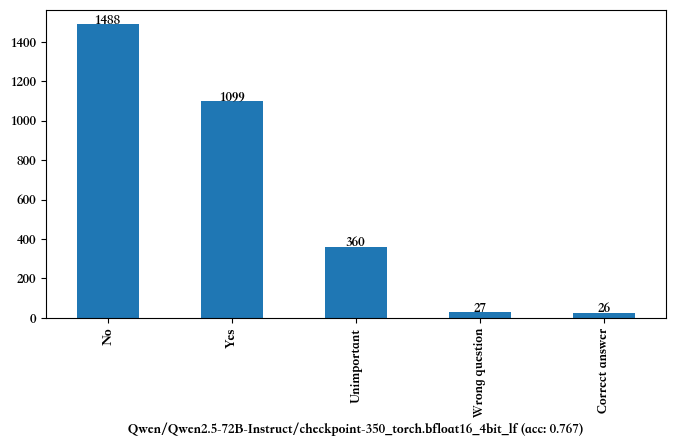

In [82]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

In [83]:
text = """Human: 他想抓住这个动物
Assistant: 不是

根据谜"""
extract_answer_from_text(text, "他想抓住这个动物")

'Human: 他想抓住这个动物'

In [84]:

def extract_answer_from_qwen2_5_72b(row, col):
    text = row[col]
    question = row["text"]
    return extract_answer_from_text(text, question)

**********

 Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit_lf **********


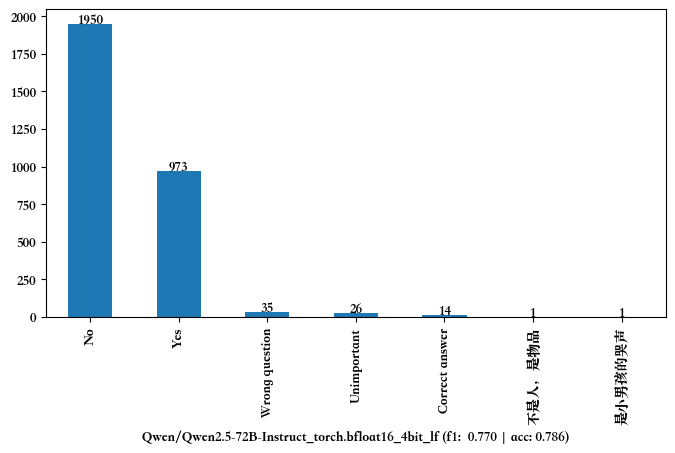

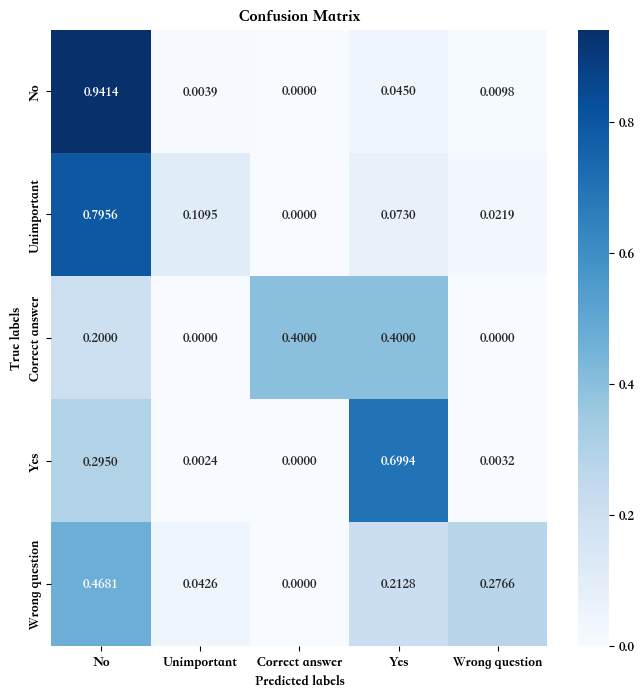

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit_lf **********


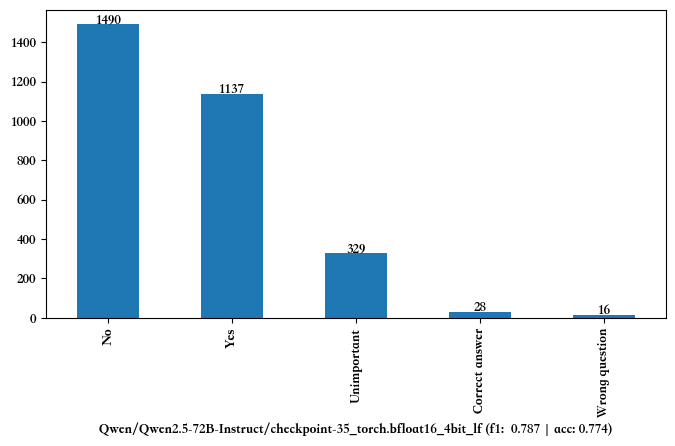

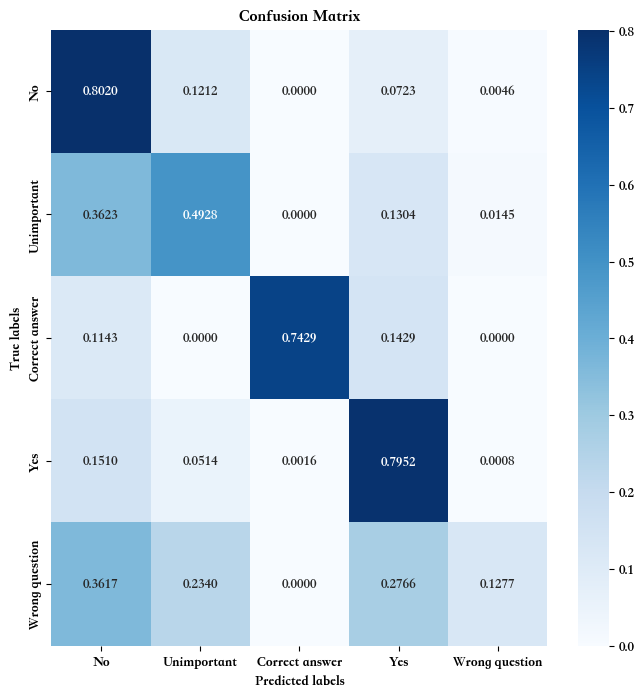

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit_lf **********


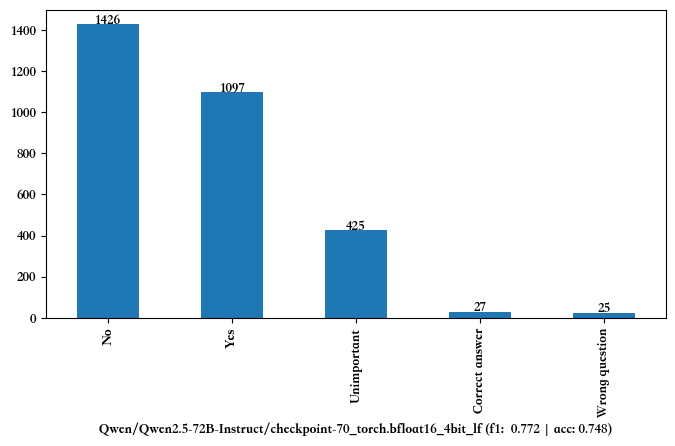

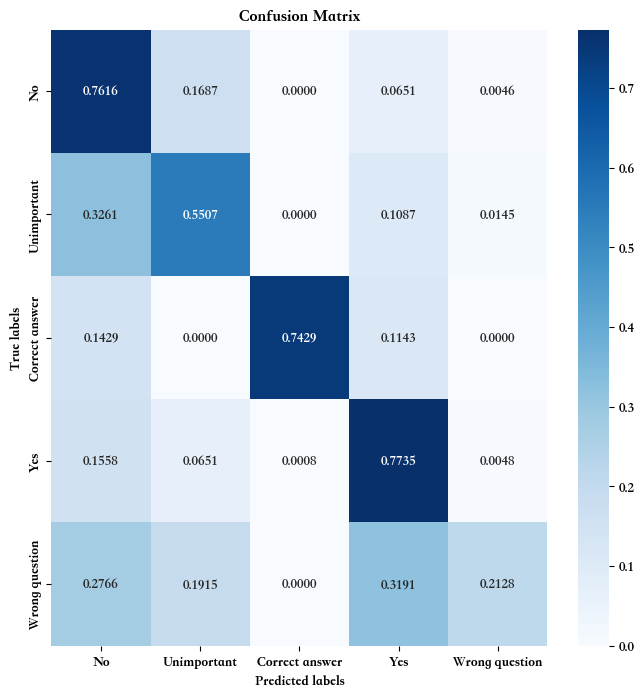

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit_lf **********


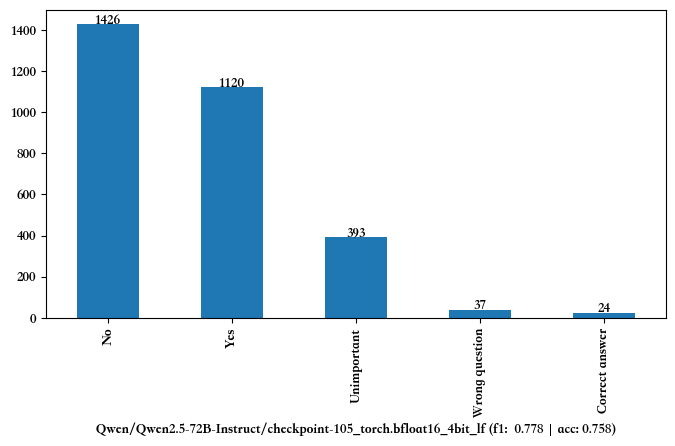

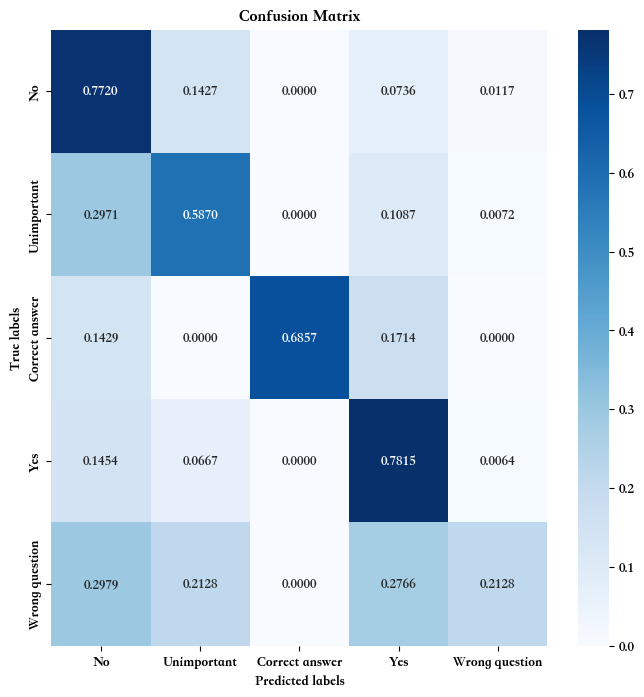

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-140_torch.bfloat16_4bit_lf **********


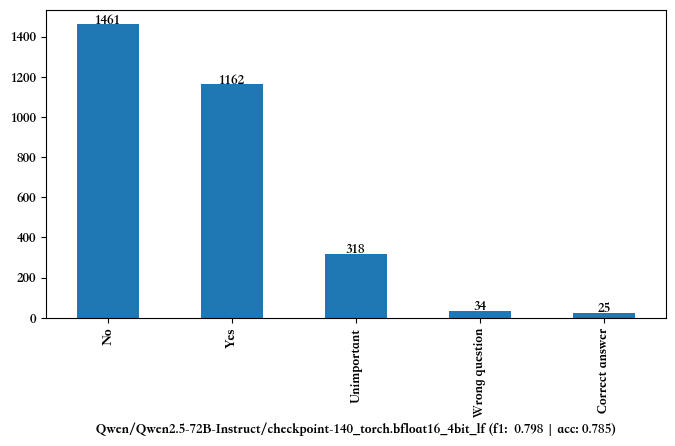

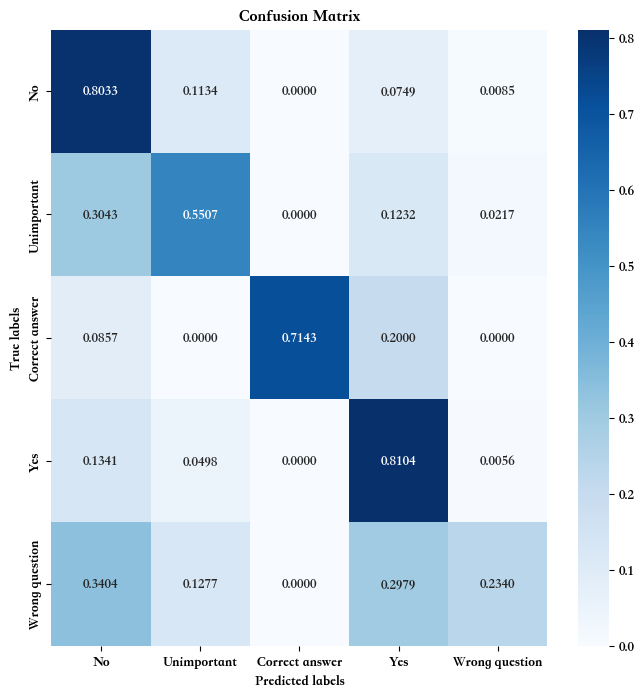

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-175_torch.bfloat16_4bit_lf **********


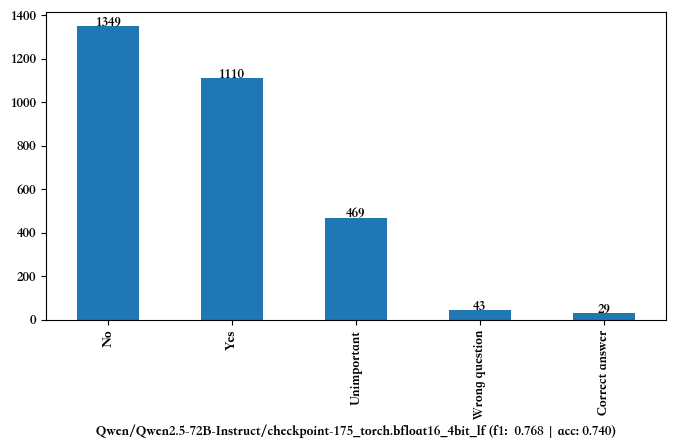

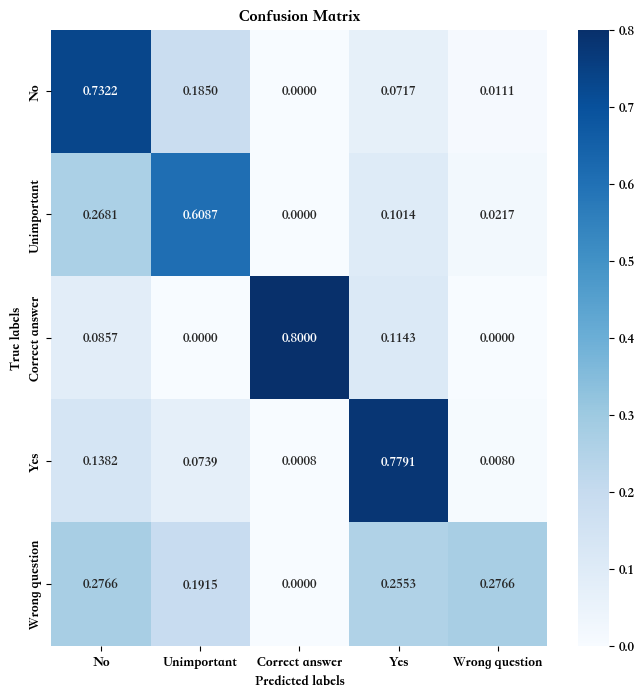

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-210_torch.bfloat16_4bit_lf **********


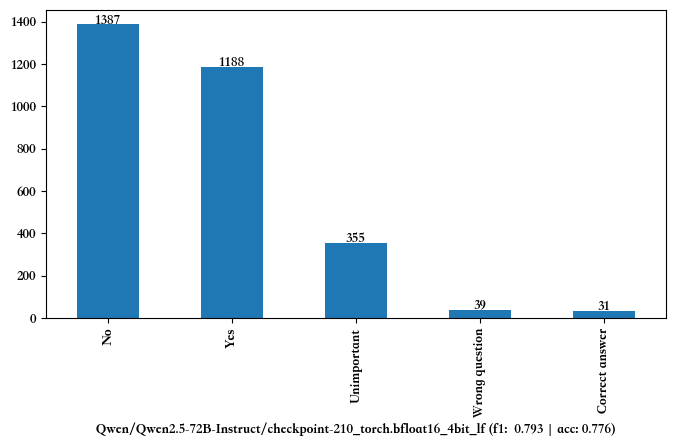

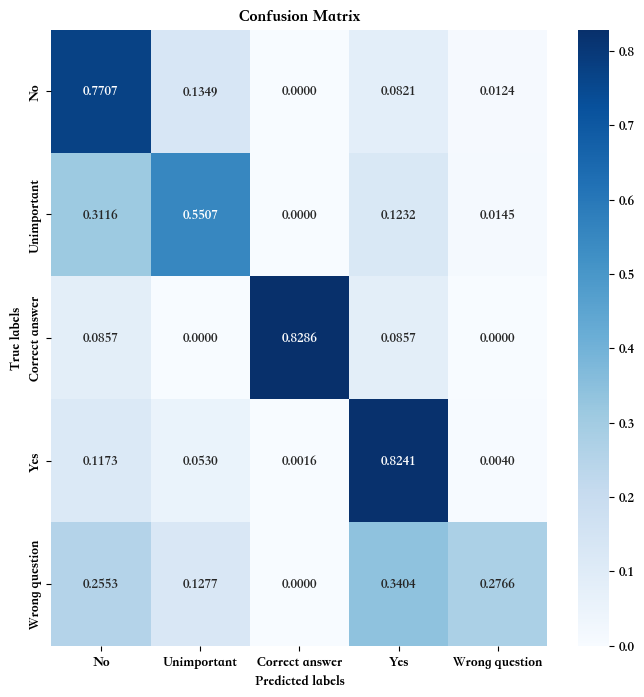

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-245_torch.bfloat16_4bit_lf **********


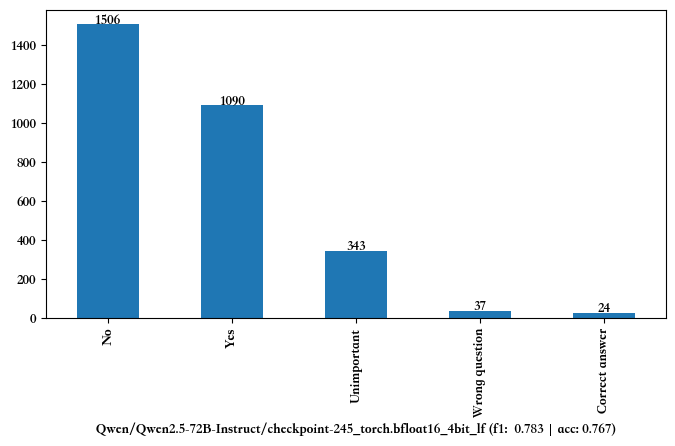

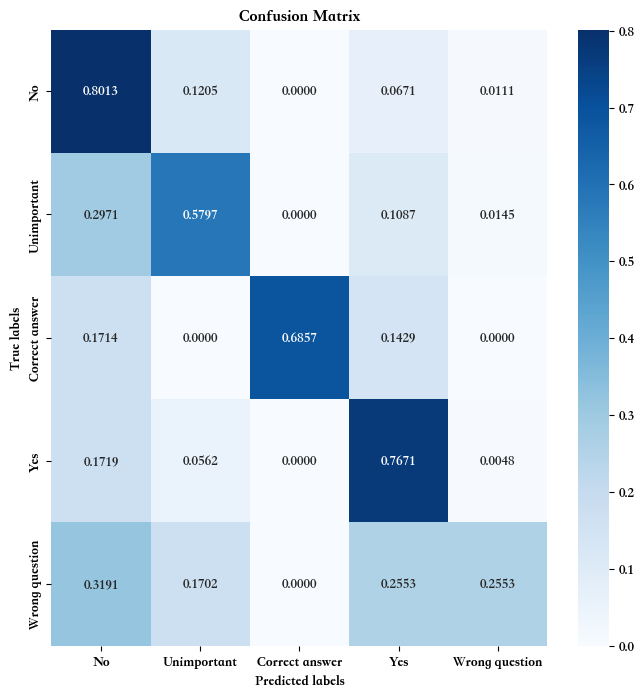

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-280_torch.bfloat16_4bit_lf **********


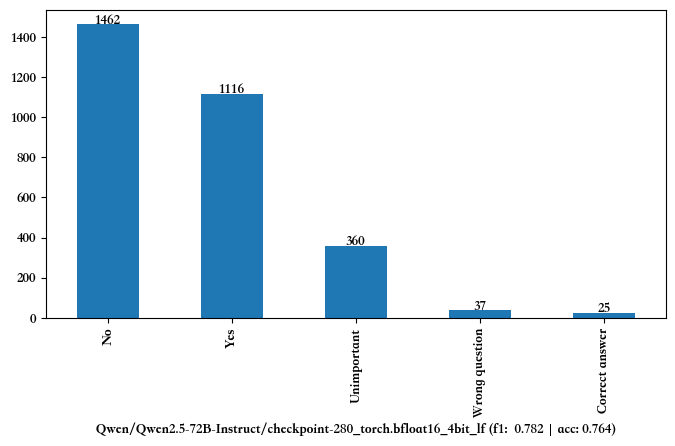

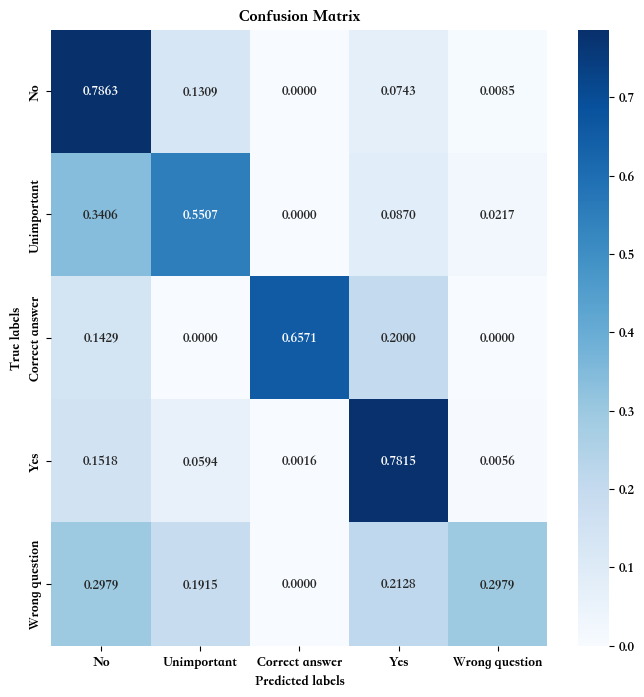

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-315_torch.bfloat16_4bit_lf **********


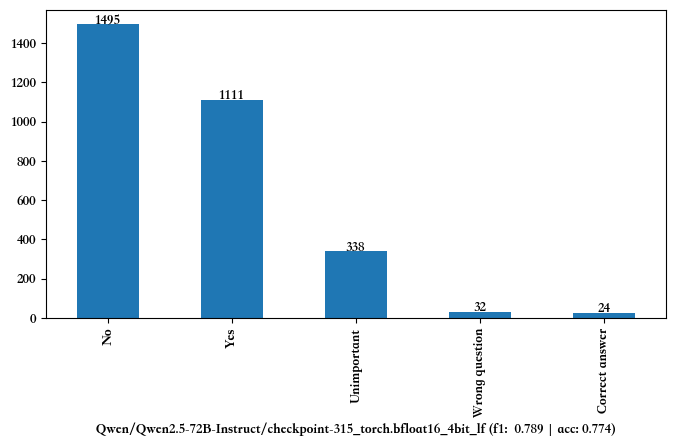

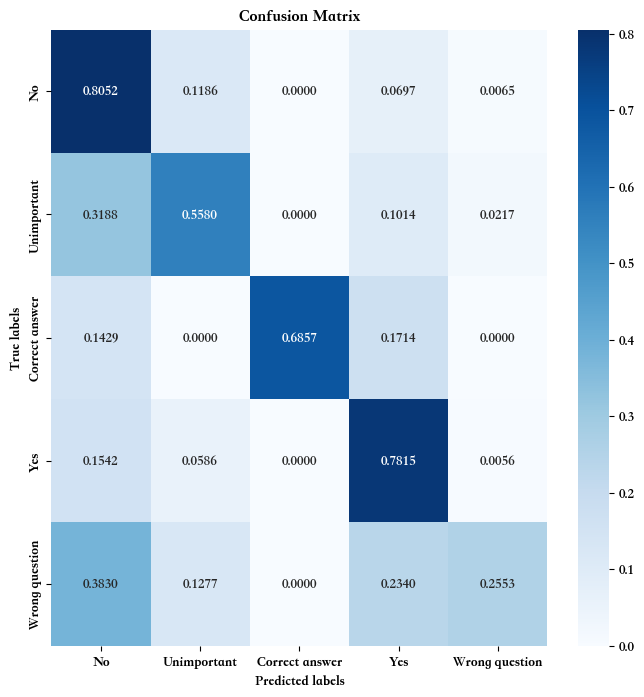

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-350_torch.bfloat16_4bit_lf **********


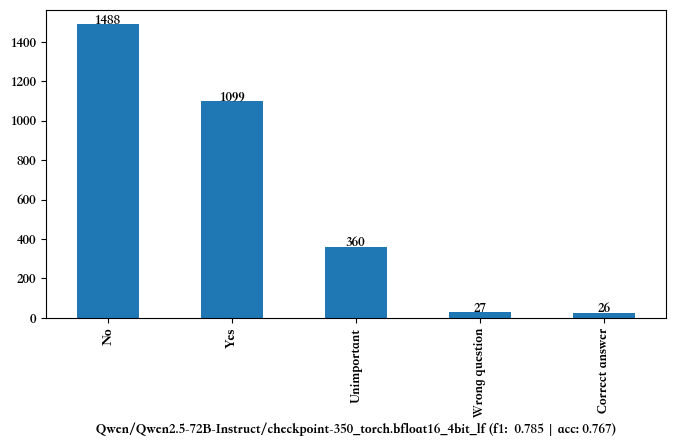

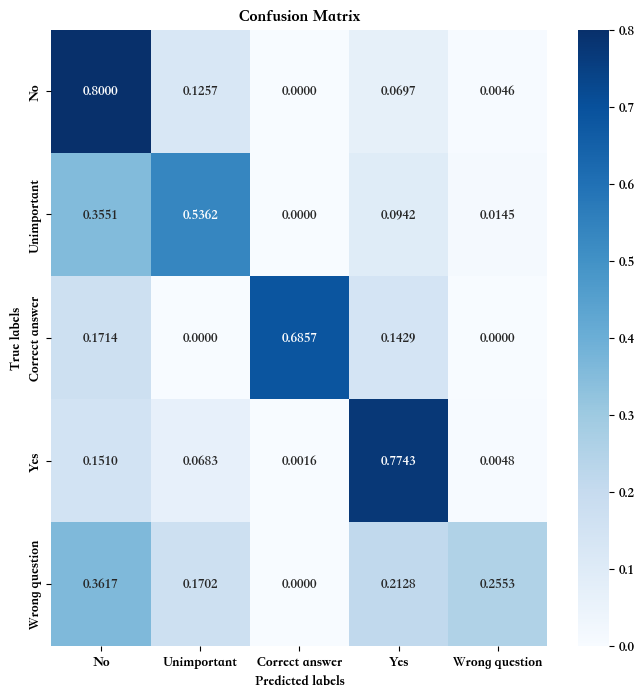

In [85]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    # print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=lambda x: extract_answer_from_qwen2_5_72b(x, col),
    )